In [1]:
import pandas as pd 
import pickle as pc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
DATA_PATH = 'Exam_Score_Prediction.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [3]:
#check for NA values 
df.isna().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_9804\3674082782.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


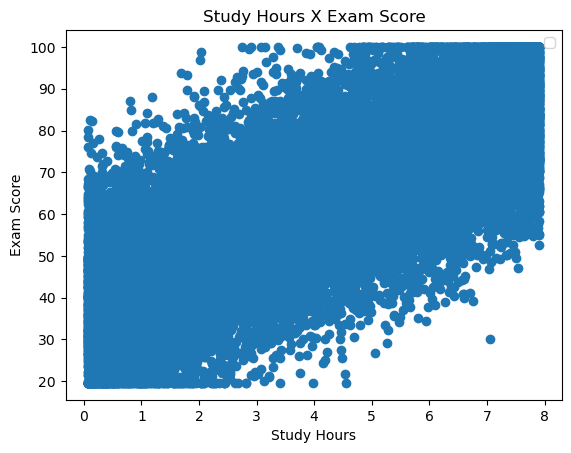

In [4]:
#check single variable clf
plt.scatter(df.study_hours, df.exam_score)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours X Exam Score')
plt.legend(loc="best")

In [5]:
'''
    It appears that study hours vs exam score forms a straight linear line, the best model to use will be LinearRegression Model   
'''
clf = LinearRegression().fit(df[['study_hours']], df.exam_score)
clf.predict([[2.80]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55.41282609])

In [18]:
#check mse error and r2 score
single_y_pred = clf.predict(df[['study_hours']])
print(f"MSE error is {mean_squared_error(df[['study_hours']], single_y_pred)}")
#print(f'r2_score is {r2_score(df[['exam_score']], single_y_pred)}')
print(f'Accuracy is {round((clf.score(df[['study_hours']], df.exam_score)) * 100)}')

MSE error is 3549.778536919737
Accuracy is 52


# Exam Score Prediction Using Linear Regression 
# PART A
### I first compared the relationship between the student study hours and the students exams score use a scatter plot, i then noticed a linear line meaning the best model to use is a LinearRegression model(study_hours as the only feature and exam_sore as the target). After model training i calculated the accurate and got a model score of (51.52196041984326). This shows that the target does not totally defend on only the students study_hours but other factors like the sleep_hours, class_attendance and some other features

In [7]:
#lets use multivariate regression since the accuracy of the single variable is quit low
categorical_cols = ['gender',
                   'course',
                   'internet_access',
                   'sleep_quality',
                   'study_method',
                   'facility_rating',
                   'exam_difficulty']
dum = pd.get_dummies(df, categorical_cols, drop_first=True)
dum.head()                 

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,1,17,2.78,92.9,7.4,58.9,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,2,23,3.37,64.8,4.6,54.8,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
2,3,22,7.88,76.8,8.5,90.3,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,4,20,0.67,48.4,5.8,29.7,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
4,5,20,0.89,71.6,9.8,43.7,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [8]:
X = dum.drop(columns=['exam_score'])
Y = dum.exam_score
X.head()

,student_id,age,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,1,17,2.78,92.9,7.4,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,2,23,3.37,64.8,4.6,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
2,3,22,7.88,76.8,8.5,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,4,20,0.67,48.4,5.8,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,5,20,0.89,71.6,9.8,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [9]:
#using train test split i will train and test the model 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
len(x_train)

16000

In [10]:
model = LinearRegression().fit(x_train, y_train)
model

LinearRegression()

In [19]:
#check mse error and r2 score
single_y_pred = model.predict(x_test)
print(f"MSE error is {mean_squared_error(y_test, single_y_pred)}")
#print(f'r2_score is {r2_score(y_test, single_y_pred)}')
print(f'Accuracy is {round((model.score(x_test, y_test)) * 100)}')

MSE error is 95.33832152241634
Accuracy is 73


In [12]:
modell = Lasso().fit(X, Y)
modelr = Ridge().fit(X, Y)

In [13]:
#check mse error and r2 score
single_y_pred = modell.predict(x_test)
print(f"MSE error is {mean_squared_error(y_test, single_y_pred)}")
#print(f'r2_score is {r2_score(y_test, single_y_pred)}')
print(f'Accuracy is {(modell.score(x_test, y_test)) * 100}')

MSE error is 119.65727997406493
Accuracy is 66.62565448147002


In [14]:
#check mse error and r2 score
single_y_pred = modelr.predict(x_test)
print(f"MSE error is {mean_squared_error(y_test, single_y_pred)}")
#print(f'r2_score is {r2_score(y_test, single_y_pred)}')
print(f'Accuracy is {(modelr.score(x_test, y_test)) * 100}')

MSE error is 95.09714681413789
Accuracy is 73.4758717874139


# PART B 

# I first checked for a string data type column, then use OneHot Encoding using Dummy Variables and avoided dummy variable trap since linear regression dont work with strings. I then split the data into train data to train the model and test data to test the model accuracy in other to avoid bias. Then after i trained the data on 3 models (LinearRegression, Lasso, Ridge). After training the 3 models i then compare and commpute each model accuracies and noticed that:
# 1) The model did generalize well 
# 2) The target variable exam_score strongly depend on most or all of the features 
# 3) Ridge Appears to be the model with the least Mean square error make it the best model.

In [15]:
pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

study_hours                   5.900144
sleep_quality_good            4.605742
sleep_hours                   1.431199
class_attendance              0.342285
course_bca                    0.284829
course_bba                    0.196949
gender_other                  0.152613
exam_difficulty_moderate      0.128225
gender_male                   0.105028
exam_difficulty_hard          0.068428
internet_access_yes           0.036442
student_id                    0.000010
age                          -0.010698
course_ba                    -0.023278
course_b.tech                -0.054385
course_diploma               -0.151745
course_b.sc                  -0.162694
facility_rating_medium       -3.707851
sleep_quality_poor           -4.714104
study_method_mixed           -4.942518
study_method_group study     -7.847092
facility_rating_low          -7.869912
study_method_online videos   -8.935046
study_method_self-study      -9.633011
dtype: float64

# Final Verdict
## After getting r2_score of 52% for the Single variable regression model and a r2_score of 73% for the multivariate Regression model. It has shown that the target (exam_score) does not depend only on one feature but all or most of the features. For clarification i decided to compare the coefficients of the features, it shows study_hours had most impact in the students exam score.

In [ ]:
#compare 